<a href="https://colab.research.google.com/github/samhashiyam/MachineLearning/blob/main/MLcwipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd             # For loading and manipulating datasets
import numpy as np              # For numerical operations
import matplotlib.pyplot as plt # For charts
import seaborn as sns           # For visuals

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_excel('/content/drive/MyDrive/ml/Telco-Customer-Churndataset.xlsx')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploratory Data Analysis

In [7]:
#check no.of rows and columns
df.shape

(7043, 21)

In [8]:
#print all column names
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
#check column data types
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [10]:
#check for missing values
df.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# Visualizations

In [11]:
#SUMMARY STATISTICS

#numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
#categorical
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [13]:
#target variable distribution
df['Churn'].value_counts()



,count
Churn,
No,5174
Yes,1869


<function matplotlib.pyplot.show(close=None, block=None)>

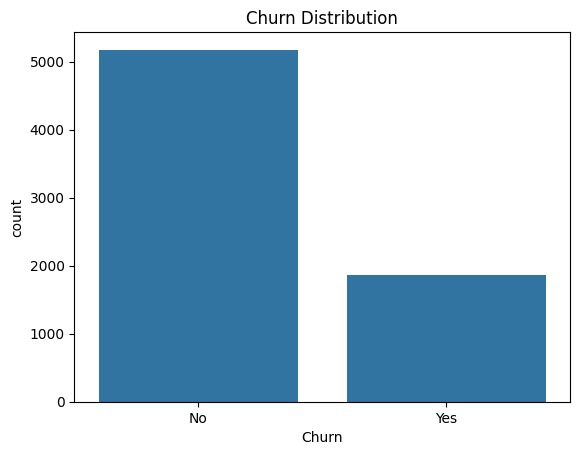

In [14]:
#Barchat for Churn distribution
sns.countplot(x=df['Churn'])
plt.title("Churn Distribution")
plt.show

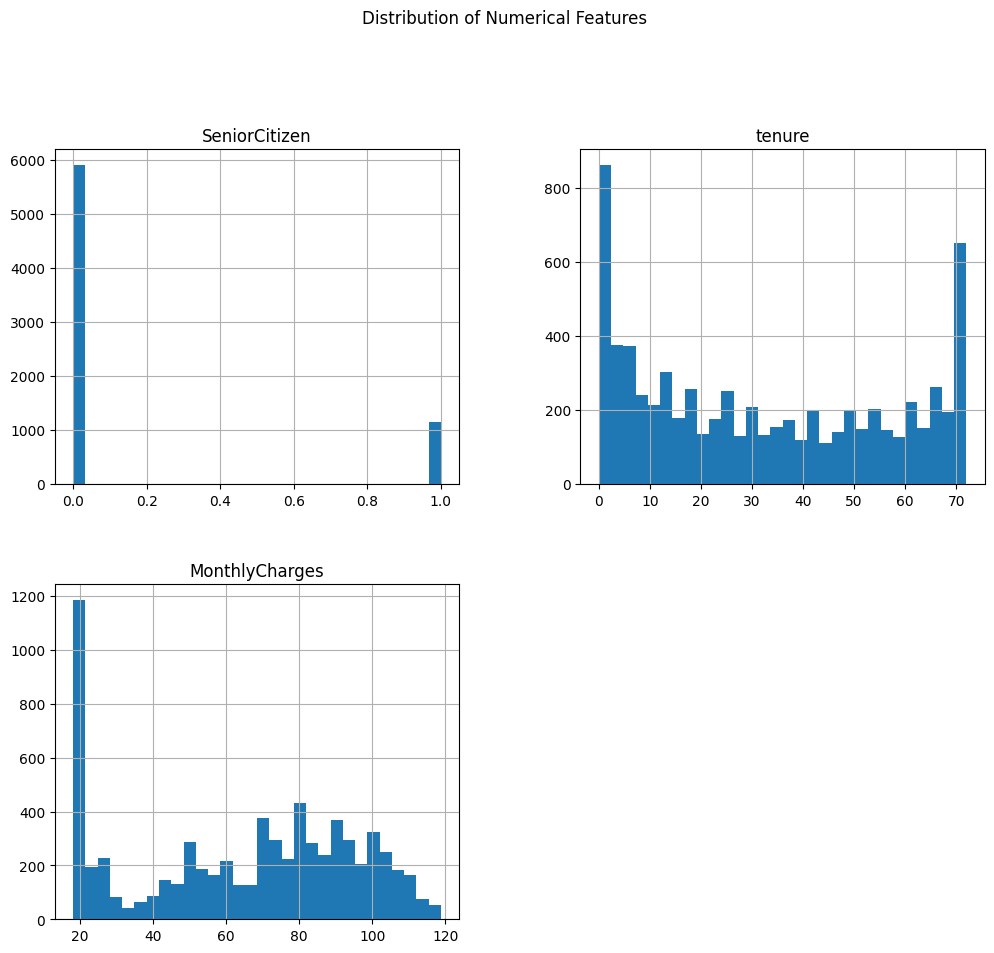

In [15]:
# HISTOGRAMS FOR NUMERIC FEATURES


numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numeric_cols].hist(figsize=(12, 10), bins=30)
plt.suptitle("Distribution of Numerical Features", y=1.02)
plt.show()


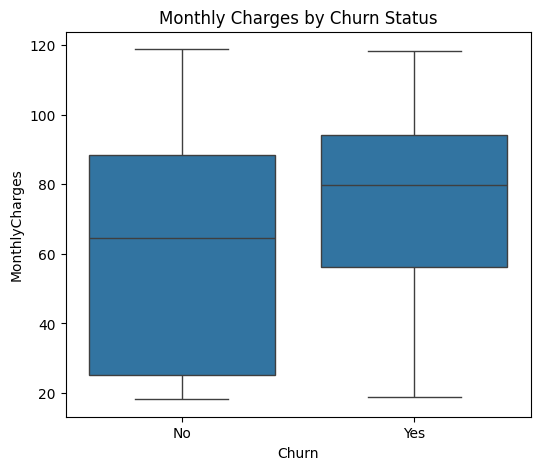

In [16]:
# BOXPLOT: MonthlyCharges vs Churn


plt.figure(figsize=(6, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges by Churn Status")
plt.show()


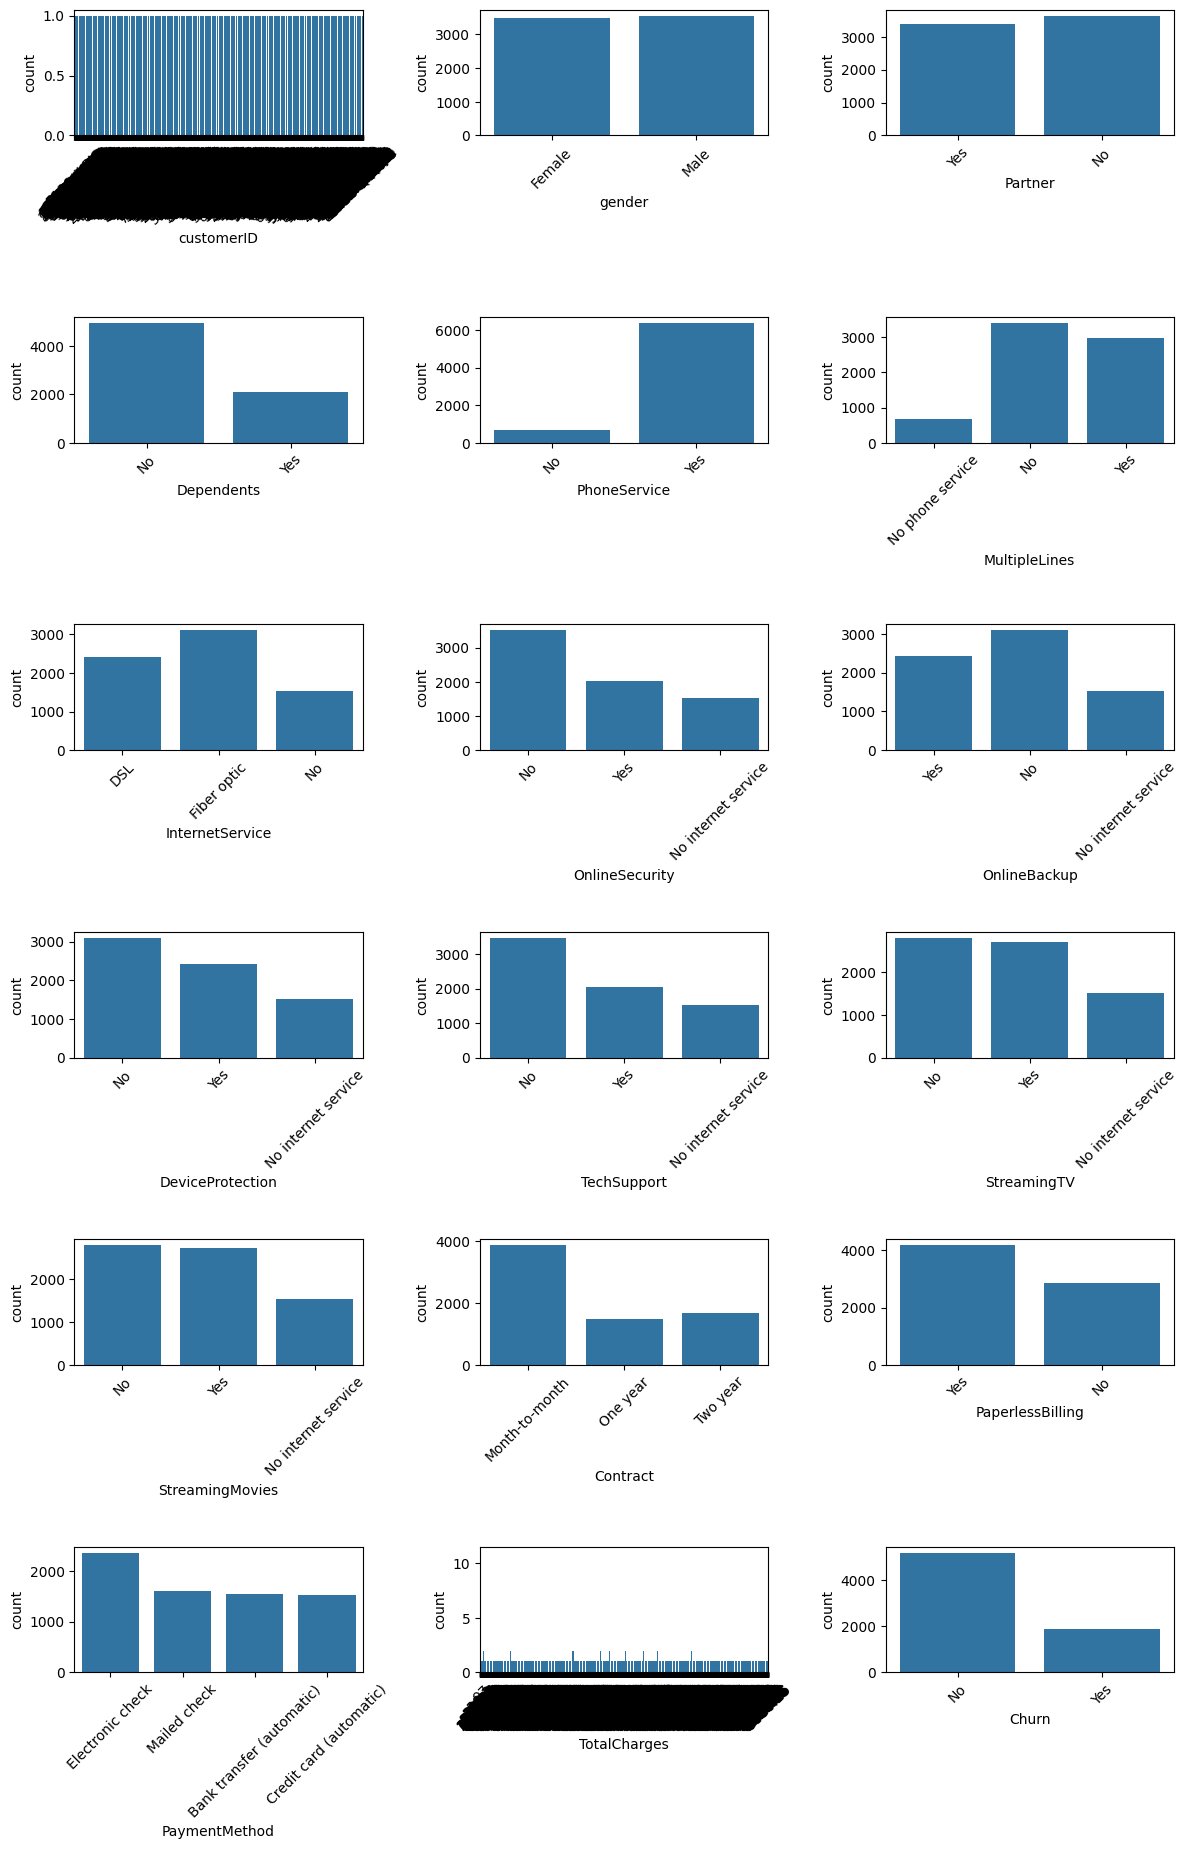

In [17]:
# COUNT PLOTS FOR CATEGORICAL FEATURES


categorical_cols = df.select_dtypes(include='object').columns

plt.figure(figsize=(12, 20))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols)//3 + 1, 3, i)
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


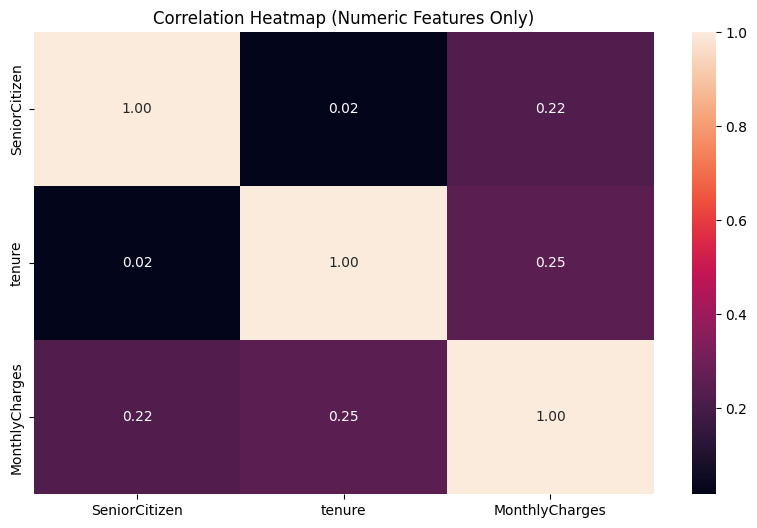

In [18]:
# FIXED CORRELATION HEATMAP


# only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()



## Pre-Processing

In [19]:
#drop customerId column(unique values)
df = df.drop(['customerID'], axis=1)
print("Dropped customerID column")

Dropped customerID column


In [20]:
# FIX TotalCharges COLUMN

# Replace spaces with NaN
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)

# Convert to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

# Show missing values count
df['TotalCharges'].isnull().sum()


/tmp/ipython-input-1313721654.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)


np.int64(11)

In [21]:
#Drop missing values(less than 10 rows missing)

df = df.dropna()
print("Remaining rows:", df.shape)

Remaining rows: (7032, 20)


In [22]:
#convert yes/no columns to 1/0
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in yes_no_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [23]:
#one-hot encoding (for categorical variables)
df = pd.get_dummies(df, drop_first=True)
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,False,...,False,False,False,False,False,False,False,False,True,False
1,0,0,0,34,1,0,56.95,1889.50,0,True,...,False,False,False,False,False,True,False,False,False,True
2,0,0,0,2,1,1,53.85,108.15,1,True,...,False,False,False,False,False,False,False,False,False,True
3,0,0,0,45,0,0,42.30,1840.75,0,True,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,2,1,1,70.70,151.65,1,False,...,False,False,False,False,False,False,False,False,True,False


# Train-test Split

In [24]:
from sklearn.model_selection import train_test_split


In [25]:
x=df.drop(columns='Churn')
y=df['Churn']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y,random_state=42)

In [29]:
print("x_train:", X_train.shape)
print("y_train:", y_train.shape)
print("x_test:", X_test.shape)
print("y_test:", y_test.shape)

x_train: (5625, 30)
y_train: (5625,)
x_test: (1407, 30)
y_test: (1407,)
